In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import datetime

In [2]:
data = pd.read_csv(open('data.csv',encoding='latin-1'))

In [3]:
data = data[~np.isnan(data['hammer_price'])]

In [4]:
data = data[data['hammer_price']>0]

In [5]:
len(data)

90980

In [6]:
# fill nan death year using average life span
temp = data[~np.isnan(data['artist_death_year'])]
mean_lifespan = np.mean(temp['artist_death_year']-temp['artist_birth_year'])

In [7]:
data['artist_death_year'] = data.apply(lambda x: x['artist_birth_year']+mean_lifespan if np.isnan(x['artist_death_year']) else x['artist_death_year'],axis=1)

In [8]:
# convert auction datetime to epoch
data['auction_date'] = data['auction_date'].map(lambda x: time.mktime(datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.000Z").timetuple()))

In [9]:
# transform all the times to time-1950/50
epoch_1950 = time.mktime(datetime.datetime.strptime("1950-01-01T00:00:00.000Z", "%Y-%m-%dT%H:%M:%S.000Z").timetuple())
epoch_50 = time.mktime(datetime.datetime.strptime("0050-01-01T00:00:00.000Z", "%Y-%m-%dT%H:%M:%S.000Z").timetuple())
data['artist_death_year'] = data['artist_death_year'].map(lambda x: (x-1950)/50.0)

data['artist_birth_year'] = data['artist_birth_year'].map(lambda x: (x-1950)/50.0)

data['auction_date'] = data['auction_date'].map(lambda x: (x-epoch_1950)/epoch_50)

In [10]:
# standard scale the measurement features
depth_mean = np.mean(data['measurement_depth_cm'])
depth_std = np.std(data['measurement_depth_cm'])
data['measurement_depth_cm'] = data['measurement_depth_cm'].map(lambda x: (x-depth_mean)/depth_std)

height_mean = np.mean(data['measurement_height_cm'])
height_std = np.std(data['measurement_height_cm'])
data['measurement_height_cm'] = data['measurement_height_cm'].map(lambda x: (x-height_mean)/height_std)

width_mean = np.mean(data['measurement_width_cm'])
width_std = np.std(data['measurement_width_cm'])
data['measurement_width_cm'] = data['measurement_width_cm'].map(lambda x: (x-width_mean)/width_std)

In [11]:
# drop features -- unsed in this model
data = data.drop(['edition', 'title', 'year_of_execution', 'materials'], axis=1)

In [12]:
temp = data[~np.isnan(data['estimate_high'])]
mean = np.mean(temp['estimate_high'])
std = np.std(temp['estimate_high'])
data['estimate_high'] = data['estimate_high'].map(lambda x: (x-mean)/std if ~np.isnan(x) else x)

temp = data[~np.isnan(data['estimate_low'])]
mean = np.mean(temp['estimate_low'])
std = np.std(temp['estimate_low'])
data['estimate_low'] = data['estimate_low'].map(lambda x: (x-mean)/std if ~np.isnan(x) else x)

data['estimate_high'] = data['estimate_high'].fillna(0)
data['estimate_low'] = data['estimate_low'].fillna(0)
data['location'] = data['location'].fillna("")

In [13]:
data

,artist_birth_year,artist_death_year,artist_name,artist_nationality,auction_date,category,currency,estimate_high,estimate_low,hammer_price,location,measurement_depth_cm,measurement_height_cm,measurement_width_cm
0,-0.96,0.640000,Wifredo Lam,Cuban,-0.019729,Painting,USD,0.000000,0.000000,280000.0,New York,-0.172983,0.607716,0.916581
1,-0.96,0.640000,Wifredo Lam,Cuban,-0.028878,Painting,EUR,0.000000,0.000000,30000.0,Versailles,-0.172983,-0.246573,-0.330671
2,-0.96,0.640000,Wifredo Lam,Cuban,-0.023111,Painting,USD,0.000000,0.000000,95000.0,New York,-0.172983,0.222448,0.554008
3,-0.96,0.640000,Wifredo Lam,Cuban,-0.019468,Unclassified,USD,0.000000,0.000000,2800.0,New York,-0.172983,-0.548087,-0.591723
4,-0.96,0.640000,Wifredo Lam,Cuban,-0.027456,Unclassified,USD,-0.161083,-0.167812,1300.0,,-0.172983,-1.100862,-0.925291
7,-0.96,0.640000,Wifredo Lam,Cuban,-0.029628,Unclassified,USD,-0.103245,-0.104263,30000.0,New York,-0.172983,-0.330327,-0.403185
8,-0.96,0.640000,Wifredo Lam,Cuban,-0.030575,Unclassified,USD,-0.146431,-0.148859,5000.0,Cincinnati,-0.172983,-0.497834,-0.519209
9,-0.96,0.640000,Wifredo Lam,Cuban,-0.021294,Sculpture,USD,0.000000,0.000000,4000.0,New York,0.643843,-0.464333,-0.301665
12,-0.96,0.640000,Wifredo Lam,Cuban,-0.029046,Painting,EUR,-0.126380,-0.126561,19000.0,Paris,-0.172983,0.172196,-0.113127
13,-0.96,0.640000,Wifredo Lam,Cuban,-0.021293,Painting,USD,0.000000,0.000000,10000.0,New York,-0.172983,-0.548087,-0.591723


## Linear regression model

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso
from collections import Counter
from sklearn.metrics import mean_squared_error, make_scorer

In [15]:
def getCateg(data,key,threshold):
    temp = Counter(data[key])
    result = {}
    ind = 0
    for l in temp:
        if l and temp[l]>threshold:
            result[l] = ind
            ind+=1
    return result

In [16]:
names = getCateg(data,"artist_name",0)
nation = getCateg(data,"artist_nationality",0)
category = getCateg(data,"category",0)
currency = getCateg(data,"currency",0)
location = getCateg(data,"location",10)

In [17]:
data['artist_name'] = data['artist_name'].apply(lambda x: names[x] if x in names else len(names))
data['artist_nationality'] = data['artist_nationality'].apply(lambda x: nation[x] if x in nation else len(nation))
data['category'] = data['category'].apply(lambda x: category[x] if x in category else len(category))
data['currency'] = data['currency'].apply(lambda x: currency[x] if x in currency else len(currency))
data['location'] = data['location'].apply(lambda x: location[x] if x in location else len(location))

In [18]:
enc = OneHotEncoder(handle_unknown='ignore',categorical_features=[2,3,5,6,10],sparse=False).fit(data)

In [19]:
numpy_data = enc.transform(data)

In [20]:
y = numpy_data[:,-4]
X = np.delete(numpy_data,-4,1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

cross validation score -110149456741.0655
test rmse 307636.3537
best alpha 359.3814


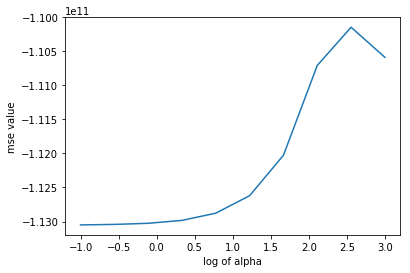

In [22]:
alphas = np.logspace(-1,3,10)
grid_params = {'alpha':alphas}
mse = make_scorer(mean_squared_error, greater_is_better=False)
grid = GridSearchCV(Lasso(fit_intercept=True, max_iter=10000, tol= 0.1,random_state=42), param_grid = grid_params, scoring = mse )

grid.fit(X_train, y_train)
grid_ridge = grid.best_estimator_
grid_ridge_train = grid.best_score_
grid_ridge.fit(X_train,y_train)
y_pred = grid_ridge.predict(X_test)
grid_ridge_test = mean_squared_error(y_pred,y_test)**0.5

print("cross validation score {:.4f}".format(grid_ridge_train))
print("test rmse {:.4f}".format(grid_ridge_test))
print("best alpha {:.4f}".format(grid.best_params_['alpha']))

scores = [x for x in grid.cv_results_['mean_test_score']]
plt.xlabel("log of alpha")
plt.ylabel("mse value")
plt.plot(np.log10(alphas),scores)

## write-up

1) Which features are most important for your model? Are there any that surprised to you? <br><br>
The Model didnt perform well and we can see the features weights are all high, so are test rmse and train rmse. suggesting that the linear model is not a good fit with the selected features. <br><br>
2) How would you quantify the uncertainty and/or confidence intervals in the predictions? <br><br>
For a Linear regression model the confidence interval can be calculated using the residual errors. we can observe the interval in which 95% of the residul errors lie and we can estimate 95% confidence interval. <br><br>
3) How would you predict the price of a work if you were only given the artist name, type of work, and size?
Generate the training data like the current model and use kernel regression to access high dimensions of the features. <br><br>
4) What happened to works by Sol Lewitt before, during and after the 2007-2008 financial crisis. How quickly did prices return to pre-2008 levels? <br><br>
Average price of the artist in 2006 is 34410.98, but in 2007-2008 it dropped to 16015.36 and 3946.73 and it quickly got up back again in 2009 - 28927.33. <br><br>
5) What additional data or features do you think would help increase performance? <br><br>
The model only tries the linear relationship of the model. Features like year of execution and description of the art might be more helpful to the model. Also with Kernel regression we can try the higher dimensions of the features. <br><br>
6) How would you determine the relationship between the size of works and their price? <br><br>
It appears from the plot they are inversly related i.e price is proportional to inverse of the size. But we also need to remove the outliers and consider difference size ranges to find the exact relationship. The premise being people are interested in arts of size that can be kept at home. <br><br>
7) How would you make sure the works you're purchasing have uncorrelated returns (so that you can maintain a diverse portfolio)? <br><br>
Consider purchasing the works randomly from top expected returns in different price ranges. <br><br>
8) What category of work do you recommend purchasing? <br><br>
Suggest using time series forcasting on average of each category by year to see the expected returns in few year and pick the one with maximum returns. Here Drawing & Watercolor has a pattern of increase in price frequently and in 2017 its price is low and from the patter price might go up <br><br> 

In [24]:
data = pd.read_csv(open('data.csv',encoding='latin-1'))
data = data[~np.isnan(data['hammer_price'])]
data = data[data['hammer_price']>0]

In [42]:
temp = data[data['artist_name']=='Sol LeWitt']

In [47]:
year_price = {}
for ind,l in temp.iterrows():
    year = int(l['auction_date'][:4])
    price = l['hammer_price']
    if year not in year_price:
        year_price[year] = []
    year_price[year].append(price)
for year in year_price:
    year_price[year] = np.mean(year_price[year])
sorted(year_price.items(),key=lambda x: x[0])

[(1985, 2266.6666666666665),
 (1986, 3300.0),
 (1987, 12787.5),
 (1988, 12166.666666666666),
 (1989, 34637.5),
 (1990, 28650.0),
 (1991, 25473.91304347826),
 (1992, 17216.129032258064),
 (1993, 17197.183098591548),
 (1994, 10770.873786407767),
 (1995, 10839.759036144578),
 (1996, 9001.7391304347821),
 (1997, 5341.0179640718561),
 (1998, 10617.708333333334),
 (1999, 11606.862745098038),
 (2000, 17064.166666666668),
 (2001, 23416.304347826088),
 (2002, 12619.469026548673),
 (2003, 23722.932330827069),
 (2004, 23176.593023255813),
 (2005, 23521.564245810056),
 (2006, 34410.976744186046),
 (2007, 16015.360000000001),
 (2008, 3946.7272727272725),
 (2009, 28927.333333333332),
 (2010, 16310.285714285714),
 (2011, 2237.5),
 (2012, 300.0),
 (2013, 5950.0),
 (2014, 11300.0),
 (2015, 5630.666666666667),
 (2016, 3300.0),
 (2017, 4066.6666666666665)]

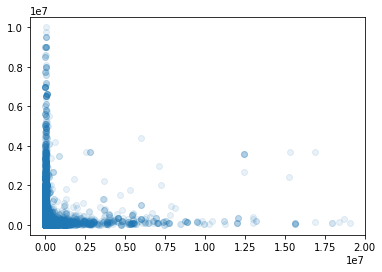

In [57]:
data['size']= data.apply(lambda x: x['measurement_height_cm']*x['measurement_width_cm'] if x['measurement_depth_cm']==0 else x['measurement_depth_cm']*x['measurement_height_cm']*x['measurement_width_cm'],axis=1)
temp = data[data['size']<=20000000]
temp = temp[temp['hammer_price']<=10000000]
plt.scatter(temp['size'],temp['hammer_price'],alpha = 0.1)

In [69]:
for categ in set(data['category']):
    print('categ : ', categ)
    temp = data[data['category']==categ]
    year_price = {}
    for ind,l in temp.iterrows():
        year = int(l['auction_date'][:4])
        price = l['hammer_price']
        if year not in year_price:
            year_price[year] = []
        year_price[year].append(price)
    for year in year_price:
        year_price[year] = np.mean(year_price[year])
    print(sorted(year_price.items(),key=lambda x: x[0]))

categ :  Etching
[(1986, 102872.70588235294), (1987, 65070.808383233532), (1988, 95459.655172413797), (1989, 153377.08333333334), (1990, 69400.0), (1991, 86671.428571428565), (1992, 71394.117647058825), (1993, 65025.0), (1994, 18838.461538461539), (1995, 12166.071428571429), (1996, 13153.125), (1997, 11589.583333333334), (1998, 24409.638554216868), (1999, 115870.0), (2000, 27381.81818181818), (2001, 18105.714285714286), (2002, 18441.697674418603), (2003, 14369.690909090908), (2004, 54644.46875), (2005, 249165.54255319148), (2006, 165355.54838709679), (2007, 118130.73529411765), (2008, 8349.5777777777785), (2009, 6816.0225806451617), (2010, 6164.8627450980393), (2011, 10057.684210526315), (2012, 4994.7931034482763), (2013, 18740.166666666668), (2014, 10372.292307692307), (2015, 3374.9789473684209), (2016, 5419.378787878788), (2017, 4464.4444444444443)]
categ :  Ceramic
[(1986, 19050.0), (1987, 41925.0), (1988, 57590.909090909088), (1989, 150000.0), (1990, 105000.0), (1992, 70000.0), (19

[(1988, 103375.0), (1989, 136204.6875), (1990, 115306.25), (1991, 289794.44444444444), (1992, 50463.095238095237), (1993, 49065.333333333336), (1994, 64205.645161290326), (1995, 23579.780564263321), (1996, 31355.151515151516), (1997, 62698.031496062991), (1998, 163764.63414634147), (1999, 81409.090909090912), (2000, 87661.728395061727), (2001, 63176.315789473687), (2002, 32839.191964285717), (2003, 35037.708955223883), (2004, 35137.84871794872), (2005, 34376.946091644204), (2006, 58330.14066496164), (2007, 108786.61413043478), (2008, 22707.956834532375), (2009, 19441.803199999998), (2010, 44350.871917808217), (2011, 28294.863703703704), (2012, 48894.702142857139), (2013, 46433.45757575758), (2014, 30685.743119266055), (2015, 51763.823899371069), (2016, 53987.011111111111), (2017, 25935.545238095237)]
categ :  Mixed media
[(1985, 38000.0), (1986, 29666.666666666668), (1987, 13333.333333333334), (1988, 53833.333333333336), (1989, 286400.0), (1990, 487400.0), (1991, 300000.0), (1992, 9333